# Математическая статистика
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 - 10 баллов
* Задача 2 - 30 баллов
* Задача 3 - 30 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 4 - 60 баллов

In [ ]:
# Bot check

# HW_ID: st_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as sps

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

-----

В этом задании вам нужно будет предобработать датасет и провести небольшой эксплораторный анализ, построив графики и посчитав несколько статистик, чтобы получить первое понимание о данных. Это та часть работы, которая является первостепенной в любом анализе. Она позволяет лучше понять объект исследования и "познакомиться" с данными.

Основная идея этого ноутбука - рассмотреть разные функции из библиотеки pandas и научиться их применять для обработки табличных данных. В качестве помощи можете воспользоваться:

- [Документация Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Упражнения по Pandas](https://www.machinelearningplus.com/python/101-pandas-exercises-python/?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/65805c3b83225d541b5a26be)

## Описание датасета

Датасет представляет из себя результаты секвенирования 16S рибосомальной РНК, необходимой для определения микробиотного состава кишечника у пациентов.

### *meta.tsv*
Табличка с метаданными - общей информацией о пациентах, полученной независимо от основного эксперимента. Нам будут интересны следующие столбцы:

- `№` - номер пациента
- `age`, `gender`, `height`, `weight`, `diet` - возраст, пол, рост, вес пациента и соблюдает ли он диету
- `diabetes` - длительность диабета
- `drug` - принимает ли пациент лекарство
- `glc`, `glyc_hem`, `ins` - уровни глюкозы, гликированного гемоглобина и инсулина в крови
- `creatinine`, `urea`, `alt`, `ast`, `c_reactive` - результаты анализов на креатинин, мочевину, АЛТ, АСТ и С реактивный белок

### *bacteria_raw_\*.tsv*
Две таблицы с результатами секвенирования (вторая таблица - продолжение первой):
- `sample` - номер пациента, совпадающий с таковым в `meta`
- `reads` - число прочтений. Величина, пропорциональная содержанию бактерий
- `tax_depth` - таксономический ранг/уровень классификации бактерии
- `name` - название бактерии

Также вам даны две предобработанные таблички: `meta_processed` и `bacteria_processed`, которые необходимо использовать для подсчета статистик и отрисовки графиков в соответствующих заданиях.


## Задача 1. Предобработка метаданных

In [ ]:
meta = pd.read_csv("/content/meta.tsv", sep="\t")

print(meta.shape)
meta.head(3)

(41, 20)


,№,age,gender,height,weight,glc,glyc_hem,ins,diabetes,drug,diet,hdl,ldl,vldl,cholesterol,creatinine,urea,alt,ast,c_reactive
0,2.0,52.0,Ж,175.0,99.0,"5,74","6,4","7,42",1.0,1.0,False,"1,23","1,81","0,56","3,6",97,"6,3",23,22,"0,9"
1,3.0,64.0,ж,172.0,87.0,"9,12","8,3","18,46",17.0,0.0,True,NaN,NaN,NaN,NaN,142,"10,18",NaN,NaN,NaN
2,6.0,58.0,Ж,158.0,80.0,"8,69","13,7",2,20.0,1.0,False,"1,25","2,2","0,55","3,88",83,"5,44",9,16,"4,3"


Можно видеть, что в табличке встречаются разные проблемы:
- точки и запятые использованы в качестве разделителя дробной части (а python принимает только точки);
- присутствует много пропусков (NaN);
- в колонке `gender` девушки записаны русскими буквами разного регистра;
- колонки `drug` и `diet` содержат информацию о наличии/отсутствии лекарств/диеты, но в одном случае это закодировано как 0/1, а в другом True/False;
- в колонце `glyc_hem` содержатся сторонние символы;

и т. д.


Все эти моменты необходимо определять во время работы с данными и чистить, чем мы ниже и будем заниматься.

Выведите названия всех колонок, которые есть в таблице. Колонку `№` переименуйте в `sample`, а `diabetes` в `diabetes_years`. Колонки `hdl`, `ldl`, `vldl` и `cholesterol` выбросите.

In [ ]:
print('название колонок: ', meta.columns)

meta.rename(columns={'№': 'sample'}, inplace=True)
meta.rename(columns={'diabetes': 'diabetes_years'}, inplace=True)
meta.drop(columns=['hdl', 'ldl', 'vldl', 'cholesterol'], inplace=True)

meta.head()

название колонок:  Index(['№', 'age', 'gender', 'height', 'weight', 'glc', 'glyc_hem', 'ins',
       'diabetes', 'drug', 'diet', 'hdl', 'ldl', 'vldl', 'cholesterol',
       'creatinine', 'urea', 'alt', 'ast', 'c_reactive'],
      dtype='object')


,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive
0,2.0,52.0,Ж,175.0,99.0,"5,74","6,4","7,42",1.0,1.0,False,97,"6,3",23,22,"0,9"
1,3.0,64.0,ж,172.0,87.0,"9,12","8,3","18,46",17.0,0.0,True,142,"10,18",NaN,NaN,NaN
2,6.0,58.0,Ж,158.0,80.0,"8,69","13,7",2,20.0,1.0,False,83,"5,44",9,16,"4,3"
3,7.0,60.0,Ж,166.0,94.0,"10,72","7,9","6,76",19.0,1.0,False,62,"4,47",49,20,"143,5"
4,8.0,51.0,Ж,172.0,92.0,"8,08","7,4","6,21",5.0,1.0,False,"97,8","5,2","30,7","33,4",NaN


Выкиньте все строчки, которые содержат NA в одной из колонок: `sample`, `age`, `gender`, `height`, `weight`, `glc`, `glyc_hem`, `ins`, `diabetes_years`

In [ ]:
meta.dropna(subset=['sample', 'age', 'gender', 'height', 'weight', 'glc', 'glyc_hem', 'ins', 'diabetes_years'], inplace=True)

Замените значение уровня гликированного гемоглобина у 5 и 6 пациентов (колонка `sample`) на значение 6

In [ ]:
meta.loc[6, 'glyc_hem'] = 6
meta.loc[5, 'glyc_hem'] = 6

Переведите колонки `sample`, `age` и `diabetis_years` в целочисленный тип, `drug` в булевый, а остальные численные колонки в тип float

*Обратите внимание, что в некоторых местах в качестве разделителя дробной части используется запятая вместо точки. Заменим ее везде на точку, например, с помощью `replace()`*.

In [ ]:
meta['sample'] = meta['sample'].astype(int)
meta['age'] = meta['age'].astype(int)
meta['diabetes_years'] = meta['diabetes_years'].astype(int)

meta['drug'] = meta['drug'].astype(bool)
cols_to_float = ['height', 'weight', 'glc', 'glyc_hem', 'ins', 'creatinine', 'urea', 'alt', 'ast', 'c_reactive']
meta[cols_to_float] = meta[cols_to_float].replace(",", ".", regex=True).astype(float)

В колонке `gender` замените обозначение женского пола на "f", а мужского на "m". Может помочь функция `np.where()`.

In [ ]:
meta['gender'] = np.where(meta['gender'].isin(['Ж', 'ж']), 'f', 'm')

Посчитайте индекс массы тела (вес человека в кг, деленный на квадрат роста в метрах), запишите его в колонку `bmi`, и индекс HOMA (произведение концентраций глюкозы и инсулина, деленное на 22.5), запишите его в колонку `homa`.

*Оставляйте значения с точностью до 2-х знаков после запятой*

In [ ]:
meta['bmi'] = meta['weight'] / (meta['height'] ** 2)
meta['homa'] = (meta['glc'] * meta['ins']) / 22.5

Клинические анализы могут варьироваться довольно сильно даже у одного пациента в пределах дня, поэтому переведите значения в категориальные данные. Если анализ меньше первого порогового значения, то такое состояние должно обозначаться -1, если в норме, то 0, если больше второго порогового значения, то 1. Здесь может помочь функция `np.where()`.

Список анализов и их граничные значения:
- `creatinine`: 57 - 115
- `urea`: 2.9 - 8.2
- `alt`: 0 - 28
- `ast`: 0 - 35
- `c reactive protein`: 0 - 5

*Обратите внимание, что nan не должны измениться (нам неизвестно соответствующее значение).*

In [ ]:
meta['creatinine']=np.where(meta['creatinine']< 57, -1, np.where((meta['creatinine'] >= 57) & (meta['creatinine'] <= 115), 0, 1))
meta['urea']=np.where(meta['urea']< 2.9, -1, np.where((meta['urea'] >= 2.9) & (meta['urea'] <= 8.2), 0, 1))
meta['alt']=np.where(meta['alt']< 0, -1, np.where((meta['alt'] >= 0) & (meta['alt'] <= 28), 0, 1))
meta['ast']=np.where(meta['ast']< 0, -1, np.where((meta['ast'] >= 0) & (meta['ast'] <= 35), 0, 1))
meta['c_reactive']=np.where(meta['c_reactive']< 0, -1, np.where((meta['c_reactive'] >= 0) & (meta['c_reactive'] <= 5), 0, 1))

Создайте столбец `obesity`, в котором будет обозначаться степень ожирения пациента (от 0 до 3 включительно). Ее определяют по индексу массы тела, сравнивания с граничными значениями равными 25, 30 и 35.

In [ ]:
meta['obesity'] = np.where(meta['bmi'] < 25, 0,np.where(meta['bmi'] < 30, 1,np.where(meta['bmi'] < 35, 2, 3)))

***В следующих заданиях используйте предобработанную таблицу `meta_processed`***

## Задача 2. Визуализация метаданных

In [ ]:
meta = pd.read_csv("/content/meta_processed.tsv", sep="\t")

meta.head()

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive,bmi,homa,obesity
0,2,52,f,175.0,99.0,5.74,6.4,7.42,1,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
1,3,64,f,172.0,87.0,9.12,8.3,18.46,17,False,True,1.0,1.0,NaN,NaN,NaN,29.41,7.48,1
2,6,58,f,158.0,80.0,8.69,13.7,2.00,20,True,False,0.0,0.0,0.0,0.0,0.0,32.05,0.77,2
3,7,60,f,166.0,94.0,10.72,7.9,6.76,19,True,False,0.0,0.0,1.0,0.0,1.0,34.11,3.22,2
4,8,51,f,172.0,92.0,8.08,7.4,6.21,5,True,False,0.0,0.0,1.0,0.0,NaN,31.10,2.23,2


Выведите, сколько людей относится к каждой из групп (0,1,.. или True/False) с точки зрения степени ожирения и принятия лекарства. Вспользуйтесь функцией `value_counts()`.

In [ ]:
obesity_counts = meta['obesity'].value_counts()
print("количество людей по степени ожирения:",obesity_counts)

drug_counts = meta['drug'].value_counts()
print("\nколичество людей по принятию лекарства:",drug_counts)

количество людей по степени ожирения: obesity
2    12
1     7
3     6
0     4
Name: count, dtype: int64

количество людей по принятию лекарства: drug
True     22
False     7
Name: count, dtype: int64


Постройте [таблицу сопряженности](https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8) для пола и всевозможных комбинаций результатов АЛТ и АСТ. Может пригодиться функция `pd.crosstab()`.

In [ ]:
meta['alt_ast_comb'] = meta['alt'].astype(str) + '_' + meta['ast'].astype(str)
c_table = pd.crosstab(meta['gender'], meta['alt_ast_comb'])
print(c_table)

alt_ast_comb  0.0_0.0  0.0_1.0  1.0_0.0  1.0_1.0  nan_nan
gender                                                   
f                   9        0        4        3        2
m                   7        1        2        0        1


Посчитайте среднюю продолжительность диабета у каждой из групп пациентов по степени ожирения. Может пригодиться метод `groupby()`.

In [ ]:
mean_diabetes_years =meta.groupby('obesity')['diabetes_years'].mean()
print('средняя продолжительность диабета у каждой из групп пациентов по степени ожирения ', mean_diabetes_years)

средняя продолжительность диабета у каждой из групп пациентов по степени ожирения  obesity
0    13.750000
1    14.000000
2     9.583333
3     5.500000
Name: diabetes_years, dtype: float64


Посчитайте средний уровень глюкозы и число пациентов в зависимости от пола человека и является ли он старым (>= 65 лет). Используйте метод `groupby()`.

In [ ]:
meta['is_old'] = meta['age'] >= 65
grouped = meta.groupby(['gender', 'is_old']).agg({'glc': 'mean', 'sample': 'count'}).reset_index()
grouped.rename(columns={'glc': 'average_glucose', 'sample': 'patient_count'}, inplace=True)
grouped['is_old'] = grouped['is_old'].map({True: 'старше 65 лет', False: 'младше 65 лет'})
grouped['gender'] = grouped['gender'].map({'f': 'женский', 'm': 'мужской'})

print("cредний уровень глюкозы и число пациентов в зависимости от пола и возрастной категории:")
print(grouped)

cредний уровень глюкозы и число пациентов в зависимости от пола и возрастной категории:
    gender         is_old  average_glucose  patient_count
0  женский  младше 65 лет         8.350833             12
1  женский  старше 65 лет         6.673333              6
2  мужской  младше 65 лет         6.882500              4
3  мужской  старше 65 лет         7.914286              7


Постройте график зависимости уровня гликированного гемоглобина от уровня глюкозы и отобразите на нем прямую при помощи `sns.regplot()`. Измените цвета точек на черный, а прямой на красный.

Text(0, 0.5, 'уровень гликированного гемоглобина')

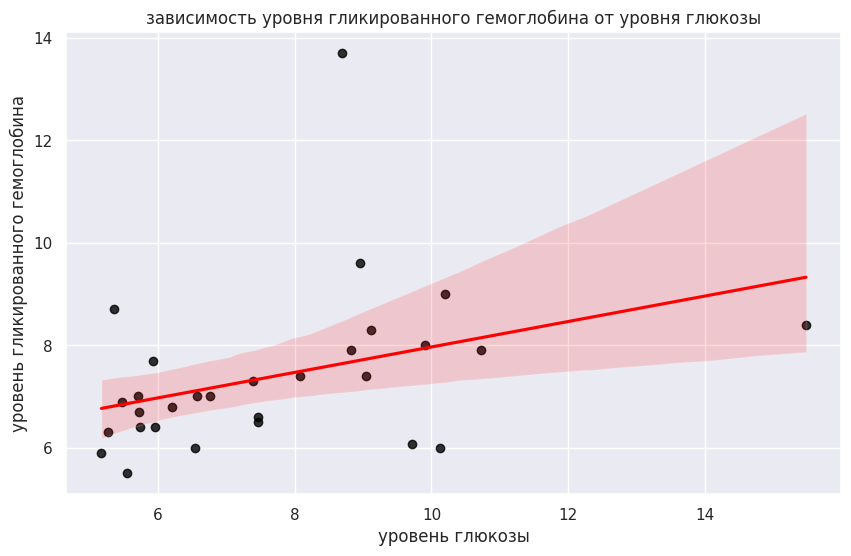

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='glc', y='glyc_hem', data=meta, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

plt.title('зависимость уровня гликированного гемоглобина от уровня глюкозы')
plt.xlabel('уровень глюкозы')
plt.ylabel('уровень гликированного гемоглобина')

Постройте график зависимости соблюдения диеты от использования лекарства и добавьте на него информацию о поле и возрасте, изменяя цвет и размер точек. Добавьте разброс точек (при помощи `sps.norm(...).rvs(...)`), чтобы они все были отчетливо видны.

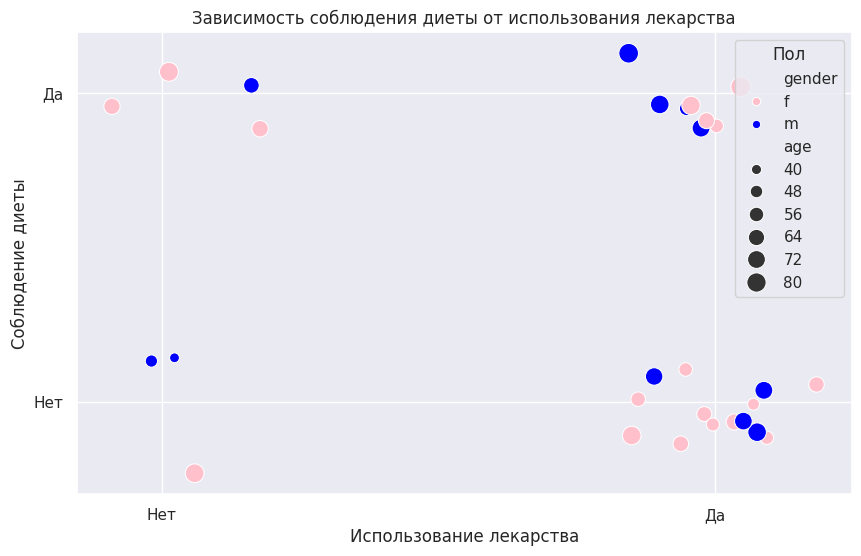

In [ ]:
meta['jitter_x'] = meta['drug'].astype(int) + sps.norm.rvs(loc=0, scale=0.1, size=len(meta))
meta['jitter_y'] = meta['diet'].astype(int) + sps.norm.rvs(loc=0, scale=0.1, size=len(meta))


plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='jitter_x',y='jitter_y',hue='gender',size='age',sizes=(50, 200),palette={'f': 'pink', 'm': 'blue'},data=meta)

plt.title('Зависимость соблюдения диеты от использования лекарства')
plt.xlabel('Использование лекарства')
plt.ylabel('Соблюдение диеты')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.yticks([0, 1], ['Нет', 'Да'])
plt.legend(title='Пол', loc='upper right')
plt.show()


## Задача 3. Предобработка данных секвенирования

Данные по содержанию бактерий хранятся в двух файлах, так как они были получены в два раунда из-за ограничений по вместимости эксперимента.

Нумерация пациентов должна быть сквозной, то есть 1 пациент во второй табличке - это 22 пациент по сквозной нумерации (которая и используется в метаданных). Поэтому прибавим 21 ко всем номерам пациентов из второго файла.

In [62]:
df1 = pd.read_csv("/content/bacteria_1.tsv", sep="\t")
df2 = pd.read_csv("/content/bacteria_2.tsv", sep="\t")

df2["sample"] += 21

data = pd.concat([df1, df2]).reset_index(drop=True)

data.iloc[600:610, :]


,sample,fraction,reads,tax_depth,name
600,21,1.45,1591,P,Proteobacteria
601,21,1.11,1229,C,Betaproteobacteria
602,21,1.07,1197,F,Alcaligenaceae
603,21,1.06,1164,G,Sutterella
604,22,83.00,46136,D,Bacteria
605,22,71.38,41294,P,Bacteroidetes
606,22,71.35,40483,C,Bacteroidia
607,22,71.35,39062,O,Bacteroidales
608,22,63.47,34938,F,Bacteroidaceae
609,22,63.44,36373,G,Bacteroides


Может случиться так, что некоторые бактерии имеют полностью совпадающие названия, даже если они находятся на разных таксономических уровнях. Проверьте, есть ли такие случаи в наших данных.

Сделать это можно, например, с помощью метода `groupby()` и подсчета числа уникальных значений в колонке `tax_depth` для каждой бактерий.

In [63]:
grouped = data.groupby('name')['tax_depth'].nunique().reset_index()
duplicates = grouped[grouped['tax_depth'] > 1]

print("бактерии с совпадающими названиями на разных таксономических уровнях:")
print(duplicates)

бактерии с совпадающими названиями на разных таксономических уровнях:
             name  tax_depth
1  Actinobacteria          2


Добавьте к названиям бактерий их таксономическую группу через нижнее подчеркивание. Удалите колонки `tax_depth` и `fraction`.

Например, ***C***    ***Bacteroidia*** -> ***Bacteroidia_C***

In [64]:
data['name'] = data['name'] + '_' + data['tax_depth'].astype(str)
data = data.drop(columns=['tax_depth', 'fraction'])
data

,sample,reads,name
0,1,81682,Bacteria_D
1,1,47936,Firmicutes_P
2,1,47549,Clostridia_C
3,1,46232,Clostridiales_O
4,1,13408,Ruminococcaceae_F
...,...,...,...
1371,49,8357,Faecalibacterium_G
1372,49,7845,Faecalibacterium prausnitzii_S
1373,49,2504,Lachnospiraceae_F
1374,49,2751,Proteobacteria_P


Оставьте в данных секвенирования и в метаданных только тех пациентов, которые присутствуют в обеих таблицах.

In [67]:
common_samples = set(meta["sample"]).intersection(set(data["sample"]))
filtered_data = data[data["sample"].isin(common_samples)]
filtered_metadata = meta[meta["sample"].isin(common_samples)]

filtered_data

,sample,reads,name
30,2,103988,Bacteria_D
31,2,88832,Bacteroidetes_P
32,2,93390,Bacteroidia_C
33,2,89610,Bacteroidales_O
34,2,68942,Bacteroidaceae_F
...,...,...,...
1318,47,360,Proteobacteria_P
1319,47,297,Betaproteobacteria_C
1320,47,307,Burkholderiales_O
1321,47,311,Alcaligenaceae_F


Разверните таблицу с данными секвенирования так, чтобы строки соответствовали пациентам, столбцы - бактериям, а на их пересечении стояло число прочтений (колонка `reads`). Воспользуйтесь методом `pivot_table()`.

*Все отсутствующие бактерии у пациентов должны быть записаны нулем прочтений.*

In [69]:
new_data = filtered_data.pivot_table(index='sample', columns='name', values='reads', fill_value=0)
new_data

name,Actinobacteria_C,Actinobacteria_P,Akkermansia muciniphila_S,Akkermansia_G,Alcaligenaceae_F,Alphaproteobacteria_C,Anaerotruncus_G,Bacilli_C,Bacteria_D,Bacteroidaceae_F,...,Victivallaceae_F,Victivallales_O,WCHB1-41_O,[Barnesiellaceae]_F,[Eubacterium] biforme_S,[Lentisphaeria]_C,[Odoribacteraceae]_F,[Paraprevotellaceae]_F,[Prevotella]_G,[Ruminococcus]_G
sample,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103988.0,68942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,0.0,0.0
3,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,7884.0,1141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1661.0,0.0,0.0,0.0,92640.0,20612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,562.0,0.0,0.0,0.0,53228.0,31164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36537.0,24494.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39792.0,8177.0,...,0.0,0.0,0.0,0.0,453.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,1237.0,0.0,0.0,338.0,30890.0,7424.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,910.0,80367.0,38622.0,...,0.0,0.0,0.0,1431.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,3654.0,3652.0,0.0,2718.0,0.0,0.0,86925.0,32654.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2043.0,0.0,0.0,0.0


Оставьте только те бактерии, которые присутствуют хотя бы у двух пациентов.

*В качестве первого шага можете сравнить табличку с нулем*

In [71]:
filtered_new_data = new_data.loc[:, (new_data > 0).sum(axis=0) >= 2]
filtered_new_data

name,Akkermansia muciniphila_S,Akkermansia_G,Alcaligenaceae_F,Bacilli_C,Bacteria_D,Bacteroidaceae_F,Bacteroidales_O,Bacteroides caccae_S,Bacteroides eggerthii_S,Bacteroides fragilis_S,...,Tenericutes_P,Veillonellaceae_F,Verrucomicrobia_P,Verrucomicrobiaceae_F,Verrucomicrobiae_C,Verrucomicrobiales_O,[Barnesiellaceae]_F,[Odoribacteraceae]_F,[Paraprevotellaceae]_F,[Prevotella]_G
sample,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,103988.0,68942.0,89610.0,2400.0,0.0,4064.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,0.0
3,0.0,0.0,114.0,0.0,7884.0,1141.0,2084.0,0.0,0.0,0.0,...,0.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1661.0,0.0,92640.0,20612.0,54911.0,0.0,0.0,0.0,...,0.0,3937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,562.0,0.0,53228.0,31164.0,38542.0,0.0,3509.0,908.0,...,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,0.0
8,0.0,0.0,0.0,0.0,36537.0,24494.0,32247.0,0.0,0.0,558.0,...,0.0,794.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0
11,0.0,0.0,0.0,0.0,39792.0,8177.0,12213.0,0.0,0.0,0.0,...,0.0,831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,1237.0,338.0,30890.0,7424.0,0.0,0.0,0.0,385.0,...,0.0,728.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,910.0,80367.0,38622.0,49180.0,0.0,0.0,1018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1431.0,0.0,0.0,0.0
16,3654.0,3652.0,0.0,0.0,86925.0,32654.0,47567.0,0.0,0.0,0.0,...,1304.0,1642.0,3591.0,3599.0,3443.0,3540.0,0.0,2043.0,0.0,0.0


***В следующих заданиях используйте предобработанную таблицу `bacteria_processed.tsv`***

## Задача 4. Визуализация данных секвенирования

In [101]:
data = pd.read_csv("/content/bacteria_processed.tsv", sep="\t", index_col=0)
data.head()

,Akkermansia muciniphila_S,Akkermansia_G,Alcaligenaceae_F,Bacilli_C,Bacteria_D,Bacteroidaceae_F,Bacteroidales_O,Bacteroides caccae_S,Bacteroides eggerthii_S,Bacteroides fragilis_S,...,Tenericutes_P,Veillonellaceae_F,Verrucomicrobia_P,Verrucomicrobiaceae_F,Verrucomicrobiae_C,Verrucomicrobiales_O,[Barnesiellaceae]_F,[Odoribacteraceae]_F,[Paraprevotellaceae]_F,[Prevotella]_G
sample,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,103988,68942,89610,2400,0,4064,...,0,0,0,0,0,0,0,0,1080,0
3,0,0,114,0,7884,1141,2084,0,0,0,...,0,219,0,0,0,0,0,0,0,0
6,0,0,1661,0,92640,20612,54911,0,0,0,...,0,3937,0,0,0,0,0,0,0,0
7,0,0,562,0,53228,31164,38542,0,3509,908,...,0,1024,0,0,0,0,0,0,1440,0
8,0,0,0,0,36537,24494,32247,0,0,558,...,0,794,0,0,0,0,0,0,0,4674


Посчитайте сколько различных бактерий каждого из таксономических рангов встречается у каждого `sample` (бактерия соответствует больше нуля прочтений) и усредните по пациентам.

In [102]:
def get_taxonomic_rank(name):
    if name.endswith('_D'):
        return 'Domain'
    elif name.endswith('_P'):
        return 'Phylum'
    elif name.endswith('_C'):
        return 'Class'
    elif name.endswith('_O'):
        return 'Order'
    elif name.endswith('_F'):
        return 'Family'
    elif name.endswith('_G'):
        return 'Genus'
    elif name.endswith('_S'):
        return 'Species'
    else:
        return 'Unknown'


taxonomic_ranks = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
bacteria_count_per_sample = pd.DataFrame(index=data.index, columns=taxonomic_ranks).fillna(0)

for rank in taxonomic_ranks:
    rank_columns = [col for col in data.columns if get_taxonomic_rank(col) == rank]
    bacteria_count_per_sample[rank] = (data[rank_columns] > 0).sum(axis=1)

average_bacteria_count = bacteria_count_per_sample.mean()

print(average_bacteria_count)

Domain     1.000000
Phylum     3.391304
Class      3.304348
Order      3.347826
Family     7.478261
Genus      4.956522
Species    3.173913
dtype: float64


<ipython-input-102-3fef7b4eaf87>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bacteria_count_per_sample = pd.DataFrame(index=data.index, columns=taxonomic_ranks).fillna(0)


Оставьте только колонки, которые соответствуют бактериям с таксономическим рангом P, и постройте для них ***stacked barplot*** процентных содержаний для каждого из пациентов. То есть для каждого `sample` должен получится столбик, который отображает процентный состав всех бактерий из таксономического ранга P.

*Для подсчета числа процентов воспользуйтесь методом `apply()`. Легенду отобразите вне графика*

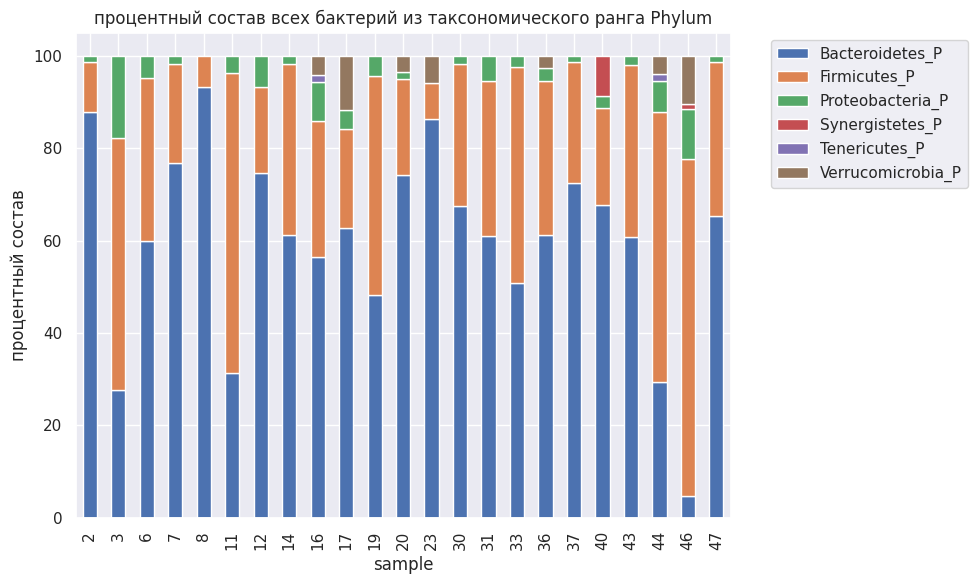

In [103]:
phylum_columns = [col for col in data.columns if get_taxonomic_rank(col) == 'Phylum']
data_phylum = data[phylum_columns]

data_phylum_percent = data_phylum.apply(lambda x: x / x.sum() * 100, axis=1)

data_phylum_percent.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel('sample')
plt.ylabel('процентный состав')
plt.title('процентный состав всех бактерий из таксономического ранга Phylum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Постройте гистограммы распределений процентного содержания (посчитанного выше) всех бактерий таксономического ранга P по пациентам. Каждую гистограмму отобразите на отдельном графике при помощи `plt.subplots()`

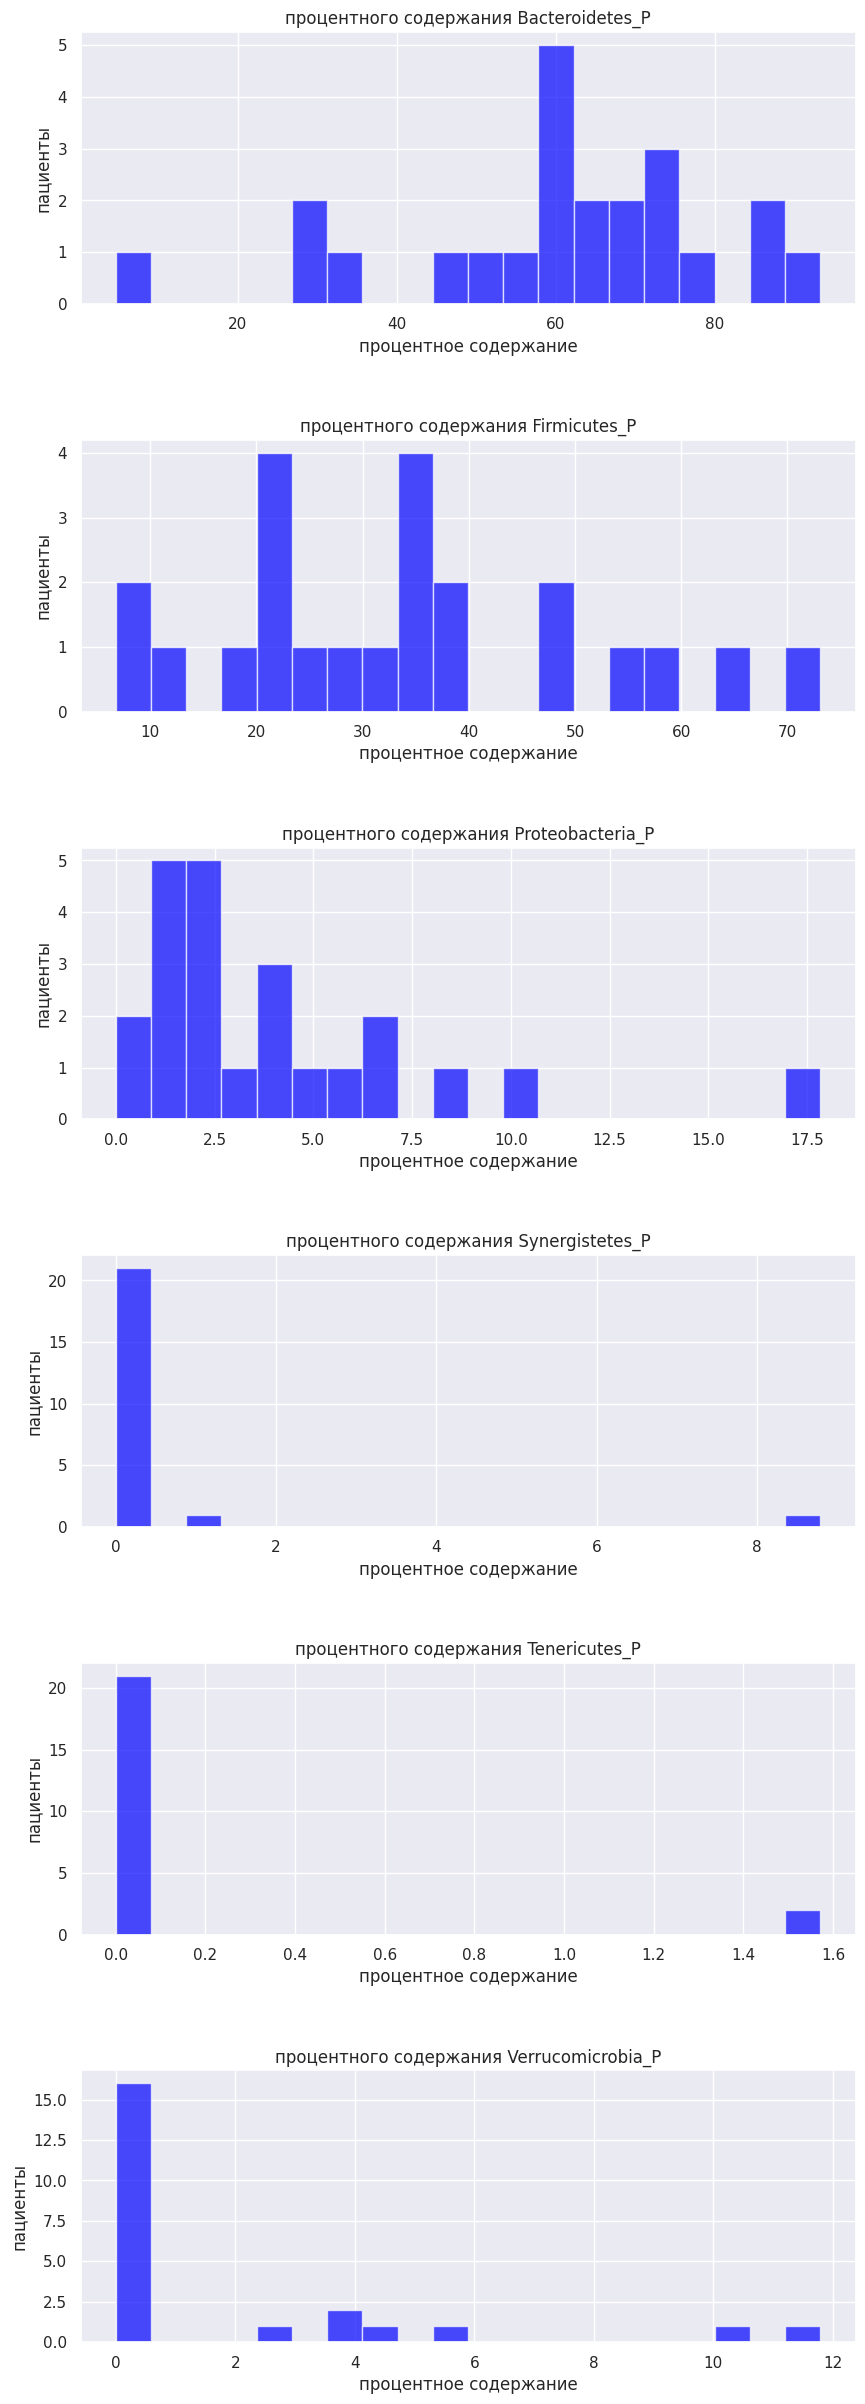

In [104]:
n= len(phylum_columns)
fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(phylum_columns):
    axes[i].hist(data_phylum_percent[col], bins=20, alpha=0.7, color='blue')
    axes[i].set_title(f'процентного содержания {col}')
    axes[i].set_xlabel('процентное содержание')
    axes[i].set_ylabel('пациенты')

Аналогично выше постройте ***stacked barplots*** для всех таксономических рангов кроме D. Графики объедините с помощью `plt.subplots()`.

*Все бактерии, которые в среднем представлены меньше, чем в одном проценте прочтений по пациентам, объедините под именем "others".*

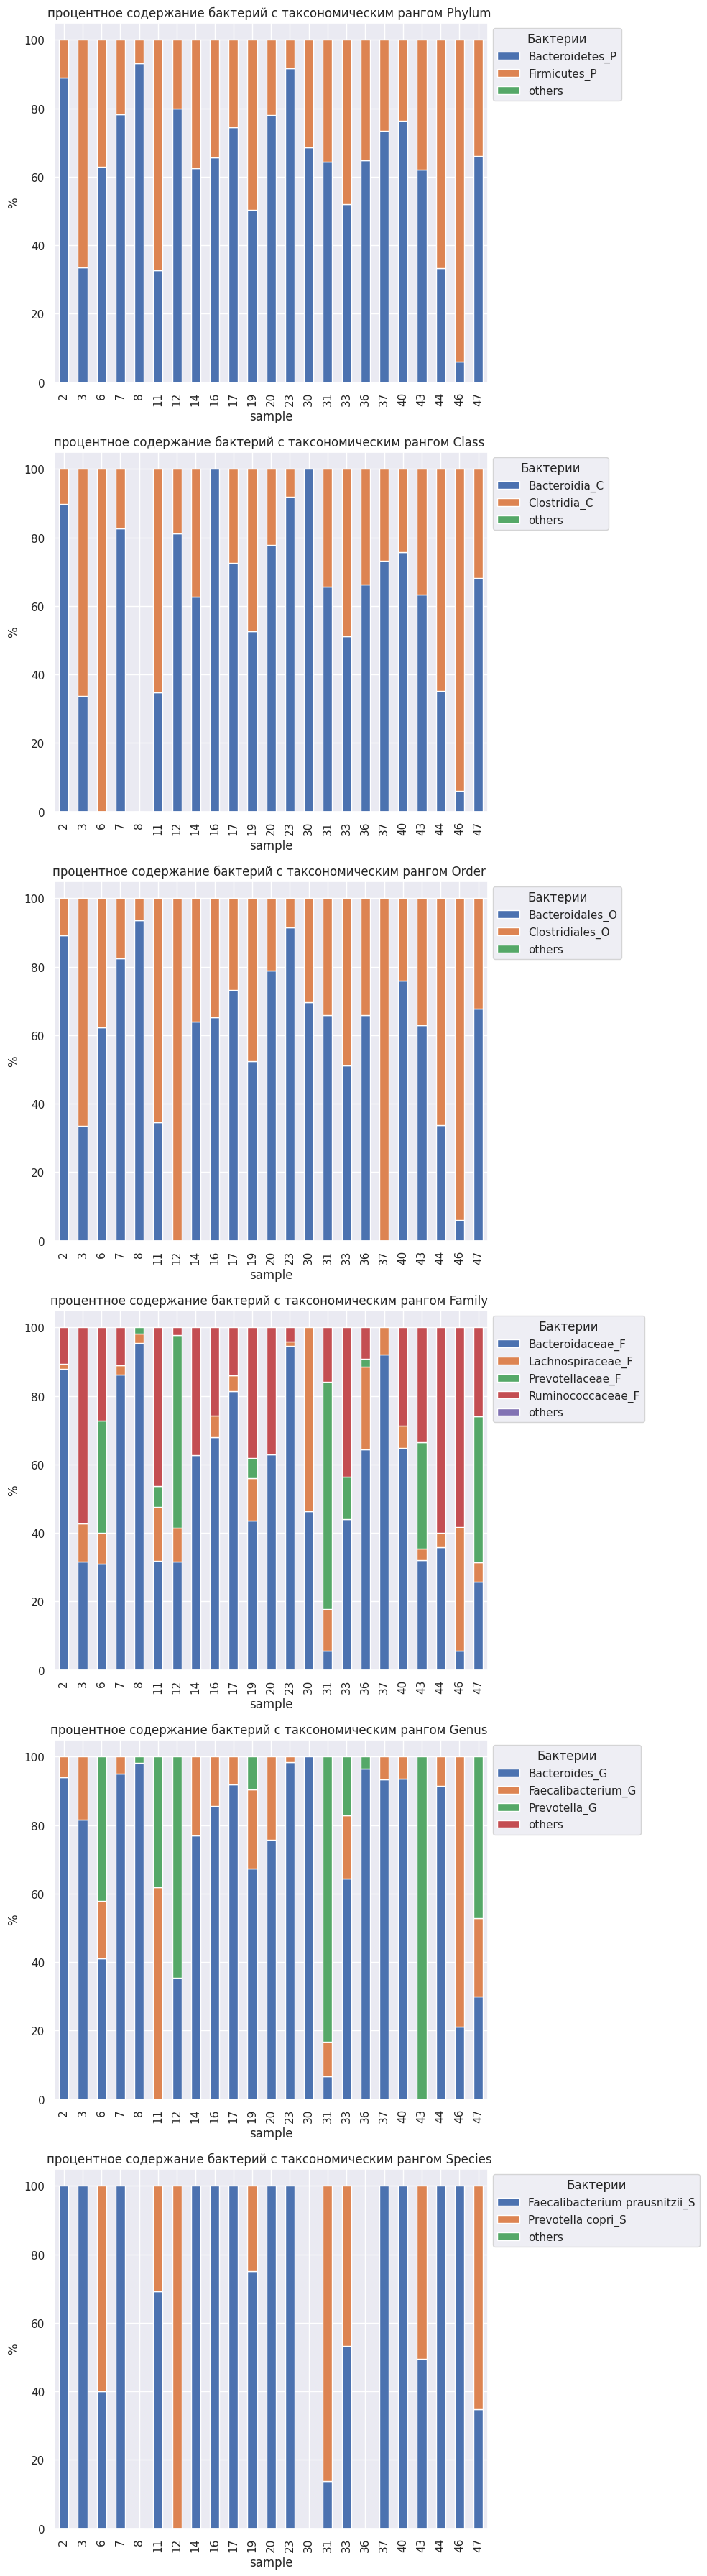

In [109]:
non_domain_columns = [col for col in data.columns if get_taxonomic_rank(col) != 'Domain']
data_non_domain = data[non_domain_columns]
data_non_domain_percent = data_non_domain.apply(lambda x: x / x.sum() * 100, axis=1)

mean_percent = data_non_domain_percent.mean()
others_columns = mean_percent[mean_percent < 1].index
data_non_domain_percent['others'] = data_non_domain_percent[others_columns].sum(axis=1)
data_non_domain_percent.drop(columns=others_columns, inplace=True)


taxonomic_ranks = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
data_non_domain_percent.columns = pd.MultiIndex.from_tuples(
    [(get_taxonomic_rank(col), col) for col in data_non_domain_percent.columns],
    names=['Taxonomic_Rank', 'Bacteria']
)

fig, axes = plt.subplots(nrows=len(taxonomic_ranks), ncols=1, figsize=(10, 6 * len(taxonomic_ranks)))

for i, rank in enumerate(taxonomic_ranks):
    if rank in data_non_domain_percent.columns.get_level_values('Taxonomic_Rank'):
        rank_data = data_non_domain_percent.xs(rank, level='Taxonomic_Rank', axis=1)
        rank_data = rank_data.apply(lambda x: x / x.sum() * 100, axis=1)

        average_percent = rank_data.mean(axis=0)
        main_bacteria = average_percent[average_percent >= 1].index
        rank_data['others'] = rank_data[rank_data.columns.difference(main_bacteria)].sum(axis=1)
        rank_main = rank_data[main_bacteria].copy()
        rank_main['others'] = rank_data['others']

        rank_main.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f"процентное содержание бактерий с таксономическим рангом {rank} ")
        axes[i].set_xlabel("sample")
        axes[i].set_ylabel("%")
        axes[i].legend(title="Бактерии", bbox_to_anchor=(1, 1), loc='upper left')
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


Разделите людей на три группы по длительности диабета:
- болеет меньше 10 лет
- болеет от 10 до 19 лет включительно
- болеет 20 лет и больше

Для каждой из групп постройте ***pie chart***, отображающий содержание бактерий ранга P.

In [111]:
dia_years = [(meta['diabetes_years'] < 10),(meta['diabetes_years'] >= 10) & (meta['diabetes_years'] <= 19),(meta['diabetes_years'] >= 20)]

In [112]:
names = ['<10 лет', '10-19 лет', 'больше 20 лет']
meta['diabetes_group'] = np.select(dia_years, names, default=np.nan)

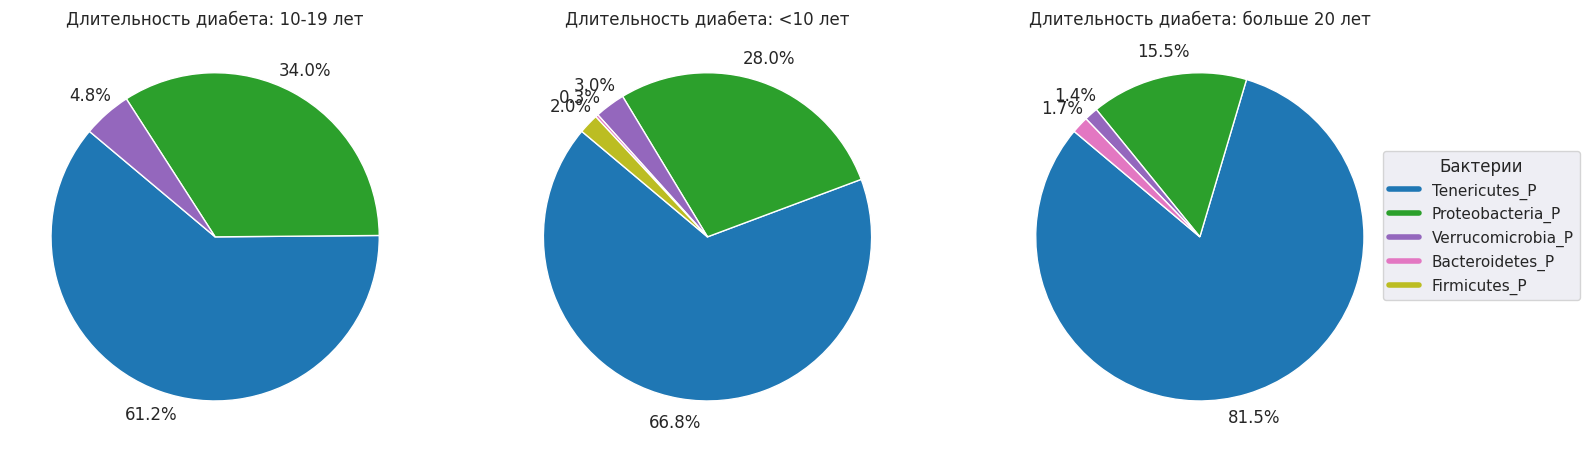

In [120]:
merged_d = meta.join(data_phylum, how='inner')

groups = merged_d.groupby('diabetes_group').sum()
groups = groups.drop(columns=['sample', 'age', 'gender', 'height', 'weight', 'glc', 'glyc_hem', 'ins', 'diabetes_years', 'drug', 'diet', 'creatinine', 'urea', 'alt', 'ast', 'c_reactive', 'bmi', 'homa', 'obesity'])

legend_labels = set()
fig, axes = plt.subplots(1, len(groups), figsize=(18, 6))

colors = plt.cm.tab20(np.linspace(0, 1, len(groups.columns)))

for i, (group, data) in enumerate(groups.iterrows()):
    data = data[data != 0]
    wedges, texts, autotexts = axes[i].pie(data, autopct='%1.1f%%', startangle=140, pctdistance=1.15, colors=colors[:len(data)])
    axes[i].set_title(f"Длительность диабета: {group}")

    legend_labels.update(data.index)


legend_patches = [plt.Line2D([0], [0], color=colors[j], lw=4) for j in range(len(legend_labels))]
fig.legend(legend_patches, legend_labels, loc='center right', title="Бактерии")
plt.show()
